In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [49]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [50]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [53]:
y_train,y_test=y_train.flatten(),y_test.flatten()
x_train,x_test=x_train/255.,x_test/255.

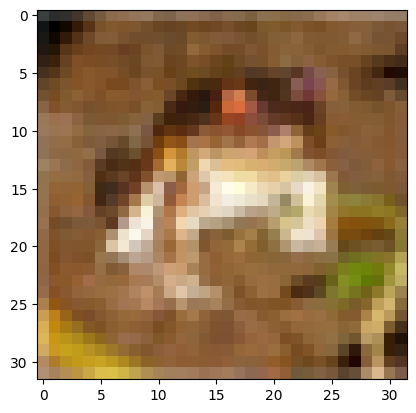

In [4]:
plt.imshow(x_train[0])

In [44]:
x_train[0].shape

(32, 32, 3)

In [57]:
i=tf.keras.layers.Input(shape=x_train[0].shape)
x=tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=2,activation='relu')(i)
x=tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dropout(.5)(x)
x=tf.keras.layers.Dense(1024,'relu')(x)
x=tf.keras.layers.Dropout(.2)(x)
x=tf.keras.layers.Dense(10,'softmax')(x)
model=tf.keras.Model(i,x)


In [58]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 15, 15, 32)        896       
                                                                 
 conv2d_50 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_15 (Flatten)        (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense_30 (Dense)            (None, 1024)              118

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [61]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10,verbose=2)


Epoch 1/10


KeyboardInterrupt: 

In [43]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.6663 - accuracy: 0.5703


[2.6662917137145996, 0.5702999830245972]